In [1]:
import pandas as pd
import numpy as np
import torch
import seaborn as sn
import matplotlib.pyplot as plt

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

C:\Users\Mohammad\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Mohammad\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


part A

In [2]:
df = pd.read_csv("houses.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

part B

In [39]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

part C

In [6]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


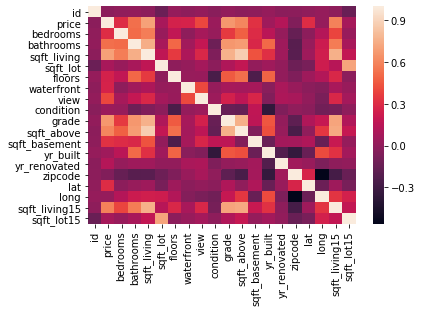

In [7]:
correlation = df.corr()
sn.heatmap(correlation)
plt.show()

In [8]:
correlation['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

part D

No handles with labels found to put in legend.


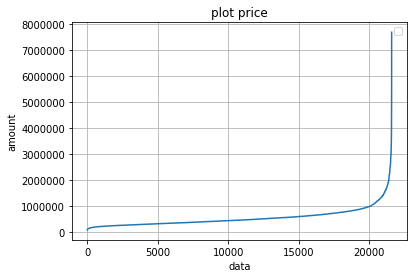

In [10]:
plt.plot(np.sort(df['price']))
plt.title("plot price")
plt.xlabel("data")
plt.ylabel("amount")
plt.legend()
plt.grid()

No handles with labels found to put in legend.


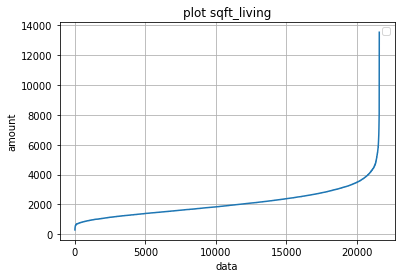

In [11]:
plt.plot(np.sort(df['sqft_living']))
plt.title("plot sqft_living")
plt.xlabel("data")
plt.ylabel("amount")
plt.legend()
plt.grid()

No handles with labels found to put in legend.


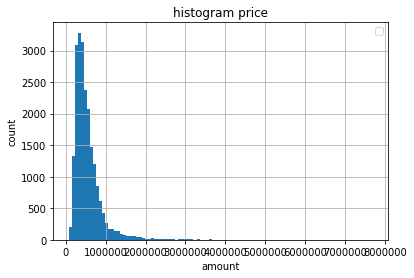

In [12]:
plt.hist(df['price'],bins = 100)
plt.title("histogram price")
plt.xlabel("amount")
plt.ylabel("count")
plt.legend()
plt.grid()

No handles with labels found to put in legend.


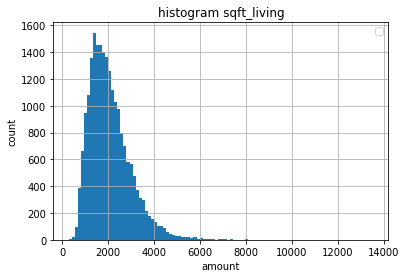

In [13]:
plt.hist(df['sqft_living'],bins = 100)
plt.title("histogram sqft_living")
plt.xlabel("amount")
plt.ylabel("count")
plt.legend()
plt.grid()

part E

In [16]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [17]:
df['year'] = df['date'].str[0:4]
df['month'] = df['date'].str[4:6]
df.drop('date', axis=1, inplace=True)

part F

In [18]:

df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

X = df.copy()
X.drop(['id', 'price'], axis=1, inplace=True)

y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

part G

In [20]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

col = X_test.columns

scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns=col)
X_test = pd.DataFrame(scaler.transform(X_test),columns=col)


X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)


(17290, 20) (4323, 20) (17290,) (4323,)


part H

In [67]:
model_1 = Sequential()
model_1.add(Dense(20 , activation = "relu"))
model_1.add(Dense(20, activation = "relu"))
model_1.add(Dense(20, activation = "relu"))
model_1.add(Dense(1))
model_1.compile(optimizer='Adam',loss='mae')


In [69]:
model_1.fit(x = X_train,y = y_train, validation_data=(X_test,y_test), epochs = 250, batch_size = 32)

Epoch 1/250
541/541 [==============================] - 1s 1ms/step - loss: 101241.0938 - val_loss: 105870.1328
Epoch 2/250
541/541 [==============================] - 1s 2ms/step - loss: 101220.4844 - val_loss: 105704.4219
Epoch 3/250
541/541 [==============================] - 1s 1ms/step - loss: 101181.4609 - val_loss: 105642.6797
Epoch 4/250
541/541 [==============================] - 1s 2ms/step - loss: 101155.3750 - val_loss: 105601.4531
Epoch 5/250
541/541 [==============================] - 1s 1ms/step - loss: 101119.1719 - val_loss: 105530.8672
Epoch 6/250
541/541 [==============================] - 1s 2ms/step - loss: 101069.3906 - val_loss: 105751.1953
Epoch 7/250
541/541 [==============================] - 1s 2ms/step - loss: 101049.5938 - val_loss: 105459.4766
Epoch 8/250
541/541 [==============================] - 1s 2ms/step - loss: 101016.9609 - val_loss: 105421.7969
Epoch 9/250
541/541 [==============================] - 1s 2ms/step - loss: 100937.2422 - val_loss: 105496.3359
E

541/541 [==============================] - 1s 2ms/step - loss: 97286.7109 - val_loss: 102070.0469
Epoch 148/250
541/541 [==============================] - 1s 2ms/step - loss: 97247.5469 - val_loss: 102084.5234
Epoch 149/250
541/541 [==============================] - 1s 2ms/step - loss: 97220.6953 - val_loss: 102071.6016
Epoch 150/250
541/541 [==============================] - 1s 2ms/step - loss: 97216.7812 - val_loss: 102182.9531
Epoch 151/250
541/541 [==============================] - 1s 2ms/step - loss: 97207.3750 - val_loss: 102093.8906
Epoch 152/250
541/541 [==============================] - 1s 1ms/step - loss: 97214.1094 - val_loss: 102041.3750
Epoch 153/250
541/541 [==============================] - 1s 2ms/step - loss: 97192.2500 - val_loss: 102066.2031
Epoch 154/250
541/541 [==============================] - 1s 1ms/step - loss: 97114.1797 - val_loss: 102084.5781
Epoch 155/250
541/541 [==============================] - 1s 2ms/step - loss: 97164.9844 - val_loss: 102097.5703
Epoch 

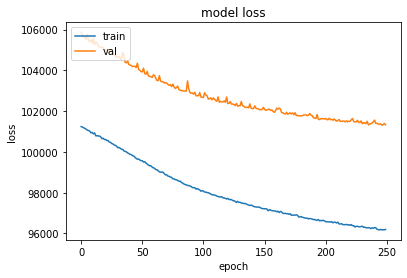

In [73]:
plt.plot(model_1.history.history['loss'])
plt.plot(model_1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [77]:
model_2 = Sequential()
model_2.add(Dense(20 , activation = "relu"))
model_2.add(Dense(20, activation = "relu"))
model_2.add(Dense(20, activation = "relu"))
model_2.add(Dense(1))
model_2.compile(optimizer='Adagrad',loss='mean_squared_logarithmic_error')


In [79]:
model_2.fit(x = X_train,y = y_train, validation_data=(X_test,y_test), epochs = 500, batch_size = 32)

Epoch 1/500
541/541 [==============================] - 1s 1ms/step - loss: 56.2813 - val_loss: 56.3776
Epoch 2/500
541/541 [==============================] - 1s 1ms/step - loss: 56.0770 - val_loss: 56.1742
Epoch 3/500
541/541 [==============================] - 1s 1ms/step - loss: 55.8752 - val_loss: 55.9734
Epoch 4/500
541/541 [==============================] - 1s 1ms/step - loss: 55.6760 - val_loss: 55.7750
Epoch 5/500
541/541 [==============================] - 1s 1ms/step - loss: 55.4791 - val_loss: 55.5790
Epoch 6/500
541/541 [==============================] - 1s 2ms/step - loss: 55.2847 - val_loss: 55.3853
Epoch 7/500
541/541 [==============================] - 1s 2ms/step - loss: 55.0926 - val_loss: 55.1940
Epoch 8/500
541/541 [==============================] - 1s 2ms/step - loss: 54.9027 - val_loss: 55.0049
Epoch 9/500
541/541 [==============================] - 1s 1ms/step - loss: 54.7151 - val_loss: 54.8180
Epoch 10/500
541/541 [==============================] - 1s 1ms/step - los

Epoch 80/500
541/541 [==============================] - 1s 1ms/step - loss: 45.1443 - val_loss: 45.2720
Epoch 81/500
541/541 [==============================] - 1s 1ms/step - loss: 45.0451 - val_loss: 45.1729
Epoch 82/500
541/541 [==============================] - 1s 1ms/step - loss: 44.9465 - val_loss: 45.0744
Epoch 83/500
541/541 [==============================] - 1s 1ms/step - loss: 44.8486 - val_loss: 44.9766
Epoch 84/500
541/541 [==============================] - 1s 1ms/step - loss: 44.7513 - val_loss: 44.8795
Epoch 85/500
541/541 [==============================] - 1s 1ms/step - loss: 44.6547 - val_loss: 44.7831
Epoch 86/500
541/541 [==============================] - 1s 1ms/step - loss: 44.5588 - val_loss: 44.6872
Epoch 87/500
541/541 [==============================] - 1s 1ms/step - loss: 44.4634 - val_loss: 44.5920
Epoch 88/500
541/541 [==============================] - 1s 1ms/step - loss: 44.3688 - val_loss: 44.4974
Epoch 89/500
541/541 [==============================] - 1s 1ms/s

541/541 [==============================] - 1s 1ms/step - loss: 33.7929 - val_loss: 33.9204
Epoch 237/500
541/541 [==============================] - 1s 1ms/step - loss: 33.7418 - val_loss: 33.8694
Epoch 238/500
541/541 [==============================] - 1s 1ms/step - loss: 33.6909 - val_loss: 33.8185
Epoch 239/500
541/541 [==============================] - 1s 1ms/step - loss: 33.6403 - val_loss: 33.7678
Epoch 240/500
541/541 [==============================] - 1s 1ms/step - loss: 33.5899 - val_loss: 33.7174
Epoch 241/500
541/541 [==============================] - 1s 1ms/step - loss: 33.5396 - val_loss: 33.6672
Epoch 242/500
541/541 [==============================] - 1s 1ms/step - loss: 33.4896 - val_loss: 33.6171
Epoch 243/500
541/541 [==============================] - 1s 1ms/step - loss: 33.4398 - val_loss: 33.5673
Epoch 244/500
541/541 [==============================] - 1s 1ms/step - loss: 33.3902 - val_loss: 33.5177
Epoch 245/500
541/541 [==============================] - 1s 1ms/step 

541/541 [==============================] - 1s 1ms/step - loss: 27.7474 - val_loss: 27.8713
Epoch 393/500
541/541 [==============================] - 1s 1ms/step - loss: 27.7177 - val_loss: 27.8416
Epoch 394/500
541/541 [==============================] - 1s 1ms/step - loss: 27.6881 - val_loss: 27.8119
Epoch 395/500
541/541 [==============================] - 1s 1ms/step - loss: 27.6585 - val_loss: 27.7823
Epoch 396/500
541/541 [==============================] - 1s 1ms/step - loss: 27.6291 - val_loss: 27.7528
Epoch 397/500
541/541 [==============================] - 1s 1ms/step - loss: 27.5997 - val_loss: 27.7234
Epoch 398/500
541/541 [==============================] - 1s 1ms/step - loss: 27.5703 - val_loss: 27.6941
Epoch 399/500
541/541 [==============================] - 1s 1ms/step - loss: 27.5411 - val_loss: 27.6649
Epoch 400/500
541/541 [==============================] - 1s 1ms/step - loss: 27.5120 - val_loss: 27.6357
Epoch 401/500
541/541 [==============================] - 1s 1ms/step 

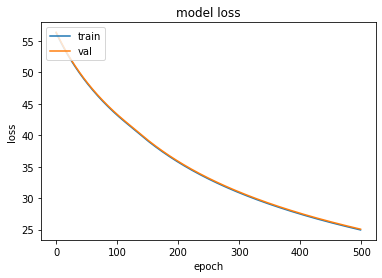

In [80]:
plt.plot(model_2.history.history['loss'])
plt.plot(model_2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [75]:
y_predict = model_1.predict(X_test)
samples = np.random.randint(1,X_test.shape[0],5)
for i in samples:
    print("perdicted" ,[i]," : ",y_predict[i])
    print("real" ,[i]," : ",y_test[i],"\n -------")

136/136 [==============================] - 0s 907us/step
perdicted [1283]  :  [1050087.1]
real [1283]  :  2205000.0 
 -------
perdicted [2584]  :  [512211.22]
real [2584]  :  399000.0 
 -------
perdicted [2723]  :  [314124.9]
real [2723]  :  342000.0 
 -------
perdicted [807]  :  [769725.44]
real [807]  :  965000.0 
 -------
perdicted [3713]  :  [257704.95]
real [3713]  :  264950.0 
 -------
